## March Madness Logistic Regression

In [108]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from math import sin, cos, sqrt, atan2, radians
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (auc, classification_report, roc_auc_score, accuracy_score,
                             f1_score, log_loss, roc_curve, confusion_matrix, precision_score, recall_score)
import statsmodels.formula.api as smf

np.random.seed(0)

In [109]:
def distance(lat1, lon1, lat2, lon2):

    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    
    return distance

In [110]:
mm_data = pd.read_csv('March Madness Data Final/NCAA_Tourney_2002_2022.csv')

In [111]:
#list(mm_data.columns)

In [112]:
mm_data['dist1'] = mm_data.apply(lambda row: distance(row['host_lat'], row['host_long'], row['team1_lat'], row['team1_long']), axis=1)
mm_data['dist2'] = mm_data.apply(lambda row: distance(row['host_lat'], row['host_long'], row['team2_lat'], row['team2_long']), axis=1)

In [113]:
mm_data['diff_dist'] = mm_data['dist1'] - mm_data['dist2']

In [114]:
mm_data 

,team1_id,team1_score,team2_id,team2_score,WLoc,num_ot,team1_position,team2_position,team1_seed,team2_seed,...,team2_tempo,team2_adjtempo,team2_oe,team2_adjoe,team2_de,team2_adjde,game_id,dist1,dist2,diff_dist
0,1314,81,1181,77,N,0,W08,X02,8,2,...,68.2765,67.4185,117.1520,119.3570,98.2346,95.6444,2022-1314-1181,1220.021558,1233.454821,-13.433263
1,1242,81,1437,65,N,0,Y01,Z02,1,2,...,64.1915,62.5758,112.8450,117.9210,97.6798,93.8099,2022-1242-1437,1107.222721,1742.257863,-635.035142
2,1242,72,1314,69,N,0,Y01,W08,1,8,...,70.2181,70.1745,109.4160,113.0350,100.9740,96.9911,2022-1242-1314,1107.222721,1220.021558,-112.798837
3,1242,76,1274,50,N,0,Y01,Y10,1,10,...,67.5221,67.3101,110.3680,114.7570,104.9830,102.1320,2022-1242-1274,715.755230,1917.073664,-1201.318434
4,1314,69,1389,49,N,0,W08,W15,8,15,...,67.0262,65.9923,98.7557,98.7475,92.3289,94.4745,2022-1314-1389,563.641920,126.854893,436.787027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,1260,78,1243,62,N,0,Y11,Y09,11,9,...,66.6000,65.5000,112.2000,108.3000,97.4000,101.6000,2018-1260-1243,960.607852,1245.143704,-284.535852
1309,1276,58,1199,54,N,0,Z03,Z09,3,9,...,72.6000,71.6000,115.8000,110.8000,100.0000,101.4000,2018-1276-1199,3129.309539,3205.169334,-75.859795
1310,1437,95,1242,79,N,0,W01,X01,1,1,...,70.1000,68.4000,120.9000,116.0000,97.7000,101.4000,2018-1437-1242,2413.515711,1102.407387,1311.108325
1311,1276,69,1260,57,N,0,Z03,Y11,3,11,...,65.9000,65.3000,111.3000,108.7000,96.2000,93.9000,2018-1276-1260,1947.730091,1704.964586,242.765505


# Pythag College Basketball
E(W%) = points scored^11.5 / (points scored^11.5+points allowed^11.5)

In [115]:
mm_data['exp_win1'] = (mm_data['team1_adjoe']**11.5)/ ((mm_data['team1_adjde']**11.5)+(mm_data['team1_adjoe']**11.5))
mm_data['exp_win2'] = (mm_data['team2_adjoe']**11.5)/ ((mm_data['team2_adjde']**11.5)+(mm_data['team2_adjoe']**11.5))

## Log Odds
P(W) = (A - A * B) / (A + B - 2*A*B)

In [116]:
mm_data['team1_log5'] = (mm_data['exp_win1'] - (mm_data['exp_win1']*mm_data['exp_win2']))/ (mm_data['exp_win1']+mm_data['exp_win2']-(2*mm_data['exp_win1']*mm_data['exp_win2']))

In [117]:
(mm_data
 [['team1_adjoe','team1_teamname','season','team2_teamname','team1_adjde','exp_win1','exp_win2','team1_log5']].head())

,team1_adjoe,team1_teamname,season,team2_teamname,team1_adjde,exp_win1,exp_win2,team1_log5
0,113.035,North Carolina,2022,Duke,96.9911,0.853260,0.927374,0.312890
1,119.388,Kansas,2022,Villanova,93.9009,0.940565,0.932803,0.532712
2,119.388,Kansas,2022,North Carolina,93.9009,0.940565,0.853260,0.731293
3,119.388,Kansas,2022,Miami FL,93.9009,0.940565,0.792545,0.805536
4,113.035,North Carolina,2022,St Peter's,96.9911,0.853260,0.624505,0.777591


## Seed Diff

In [118]:
mm_data['seed_diff'] = mm_data['team1_seed'] - mm_data['team2_seed']

In [119]:
mm_data[['game_id','exp_win1','exp_win2','team2_score',
         'team1_score','diff_dist','team1_log5','team1_id','team2_id','team1_seed','team2_seed','seed_diff']].head()

,game_id,exp_win1,exp_win2,team2_score,team1_score,diff_dist,team1_log5,team1_id,team2_id,team1_seed,team2_seed,seed_diff
0,2022-1314-1181,0.853260,0.927374,77,81,-13.433263,0.312890,1314,1181,8,2,6
1,2022-1242-1437,0.940565,0.932803,65,81,-635.035142,0.532712,1242,1437,1,2,-1
2,2022-1242-1314,0.940565,0.853260,69,72,-112.798837,0.731293,1242,1314,1,8,-7
3,2022-1242-1274,0.940565,0.792545,50,76,-1201.318434,0.805536,1242,1274,1,10,-9
4,2022-1314-1389,0.853260,0.624505,49,69,436.787027,0.777591,1314,1389,8,15,-7


## Split Data

In [120]:
mm_data.dropna(subset=['team1_log5'], inplace=True)

In [121]:
mm_data['team1_win'] = (mm_data['team1_score']>mm_data['team2_score']).astype(int)

In [122]:
mm_data['upset'] = (
    ((mm_data['team1_seed'] - mm_data['team2_seed'] >= 5) & (mm_data['team1_win'] == 1)) |
    ((mm_data['team2_seed'] - mm_data['team1_seed'] >= 5) & (mm_data['team1_win'] == 0))).astype(int)

# Define a dictionary to map the difference calculation to the exact column name you want
difference_columns = {
    'pt_team_season_wins': 'team_season_wins_diff',
    'pt_team_season_losses': 'team_season_losses_diff',
    'pt_school_ncaa': 'school_ncaa_appearances_diff',
    'pt_overall_ncaa': 'coach_ncaa_appearances_diff',
    'pt_school_s16': 'school_s16_appearances_diff',
    'pt_overall_s16': 'coach_s16_appearances_diff',
    'pt_school_ff': 'school_ff_appearances_diff',
    'pt_overall_ff': 'coach_ff_appearances_diff',
    'pt_career_school_wins': 'coach_season_wins_diff',
    'pt_career_school_losses': 'coach_season_losses_diff',
    'pt_career_overall_wins': 'coach_overall_wins_diff',
    'pt_career_overall_losses': 'coach_overall_losses_diff',
    'fg2pct': '2pt_fg_pct_diff',
    'fg3pct': '3pt_fg_pct_diff',
    'ftpct': 'ft_pct_diff',
    'blockpct': 'block_pct_diff',
    'oppfg2pct': 'opp_2pt_fg_pct_diff',
    'oppfg3pct': 'opp_3pt_fg_pct_diff',
    'oppftpct': 'opp_ft_pct_diff',
    'oppblockpct': 'opp_block_pct_diff',
    'f3grate': '3pt_fg_rate_diff',
    'oppf3grate': 'opp_3pt_fg_rate_diff',
    'arate': 'assist_rate_diff',
    'opparate': 'opp_assist_rate_diff',
    'stlrate': 'steal_rate_diff',
    'oppstlrate': 'opp_steal_rate_diff',
    'tempo': 'adj_tempo_diff',
    'adjtempo': 'time_diff_team1_host_tempo',
    'oe': 'adj_oe_diff',
    'adjoe': 'time_diff_team1_host_oe',
    'de': 'adj_de_diff',
    'adjde': 'time_diff_team1_host_de'
}


# Calculate the differences for each statistic and create new columns
for original_stat, diff_column_name in difference_columns.items():
    team1_stat = f'team1_{original_stat}'
    team2_stat = f'team2_{original_stat}'
    
    # Ensure the columns exist in the dataframe to avoid KeyError
    if team1_stat in mm_data.columns and team2_stat in mm_data.columns:
        mm_data[diff_column_name] = mm_data[team1_stat] - mm_data[team2_stat]
    else:
        print(f"One or both columns for {original_stat} difference do not exist in the dataframe.")




In [123]:
training_columns = ['game_id','season','team1_win','exp_win1','exp_win2','team2_score',
                                    'team1_score','diff_dist','team1_log5','team1_id','team2_id','seed_diff', 'team1_seed', 'team2_seed',
 'team_season_wins_diff',
 'team_season_losses_diff',
 'school_ncaa_appearances_diff',
 'coach_ncaa_appearances_diff',
 'school_s16_appearances_diff',
 'coach_s16_appearances_diff',
 'school_ff_appearances_diff',
 'coach_ff_appearances_diff',
 'coach_season_wins_diff',
 'coach_season_losses_diff',
 'coach_overall_wins_diff',
 'coach_overall_losses_diff',
 '2pt_fg_pct_diff',
 '3pt_fg_pct_diff',
 'ft_pct_diff',
 'block_pct_diff',
 'opp_2pt_fg_pct_diff',
 'opp_3pt_fg_pct_diff',
 'opp_ft_pct_diff',
 'opp_block_pct_diff',
 '3pt_fg_rate_diff',
 'opp_3pt_fg_rate_diff',
 'assist_rate_diff',
 'opp_assist_rate_diff',
 'steal_rate_diff',
 'opp_steal_rate_diff',
 'adj_tempo_diff',
 'time_diff_team1_host_tempo',
 'adj_oe_diff',
 'time_diff_team1_host_oe',
 'adj_de_diff',
 'time_diff_team1_host_de']
mm_data_1 = mm_data.sample(frac=.5, random_state=15)[training_columns]
mm_data_2 = mm_data[~mm_data.index.isin(mm_data_1.index)][training_columns].reset_index(drop=True)
mm_data_1 = mm_data_1.reset_index(drop=True)

In [124]:
mm_data_2['team1_win'] = 0
mm_data_2['diff_dist'] = mm_data_2['diff_dist']*-1
mm_data_2['team1_log5'] = 1-mm_data_2['team1_log5']
mm_data_2['game_id'] = (mm_data_2['game_id'].str.split('-', expand=True)[0] 
                           + '-' + mm_data_2['game_id'].str.split('-', expand=True)[2] 
                           + '-' + mm_data_2['game_id'].str.split('-', expand=True)[1]
                           ) 
mm_data_2['seed_diff'] = mm_data_2['seed_diff']*-1

# Invert the sign of the difference variables in mm_data_2 to reflect the swapped outcomes
difference_variables = ['team_season_wins_diff',
 'team_season_losses_diff',
 'school_ncaa_appearances_diff',
 'coach_ncaa_appearances_diff',
 'school_s16_appearances_diff',
 'coach_s16_appearances_diff',
 'school_ff_appearances_diff',
 'coach_ff_appearances_diff',
 'coach_season_wins_diff',
 'coach_season_losses_diff',
 'coach_overall_wins_diff',
 'coach_overall_losses_diff',
 '2pt_fg_pct_diff',
 '3pt_fg_pct_diff',
 'ft_pct_diff',
 'block_pct_diff',
 'opp_2pt_fg_pct_diff',
 'opp_3pt_fg_pct_diff',
 'opp_ft_pct_diff',
 'opp_block_pct_diff',
 '3pt_fg_rate_diff',
 'opp_3pt_fg_rate_diff',
 'assist_rate_diff',
 'opp_assist_rate_diff',
 'steal_rate_diff',
 'opp_steal_rate_diff',
 'adj_tempo_diff',
 'time_diff_team1_host_tempo',
 'adj_oe_diff',
 'time_diff_team1_host_oe',
 'adj_de_diff',
 'time_diff_team1_host_de']

for variable in difference_variables:
    mm_data_2[variable] = mm_data_2[variable] * -1

    
mm_data_2.columns = ['game_id','season','team1_win','exp_win1','exp_win2','team2_score',
                                    'team1_score','diff_dist','team1_log5','team1_id','team2_id','seed_diff', 'team1_seed', 'team2_seed',
 'team_season_wins_diff',
 'team_season_losses_diff',
 'school_ncaa_appearances_diff',
 'coach_ncaa_appearances_diff',
 'school_s16_appearances_diff',
 'coach_s16_appearances_diff',
 'school_ff_appearances_diff',
 'coach_ff_appearances_diff',
 'coach_season_wins_diff',
 'coach_season_losses_diff',
 'coach_overall_wins_diff',
 'coach_overall_losses_diff',
 '2pt_fg_pct_diff',
 '3pt_fg_pct_diff',
 'ft_pct_diff',
 'block_pct_diff',
 'opp_2pt_fg_pct_diff',
 'opp_3pt_fg_pct_diff',
 'opp_ft_pct_diff',
 'opp_block_pct_diff',
 '3pt_fg_rate_diff',
 'opp_3pt_fg_rate_diff',
 'assist_rate_diff',
 'opp_assist_rate_diff',
 'steal_rate_diff',
 'opp_steal_rate_diff',
 'adj_tempo_diff',
 'time_diff_team1_host_tempo',
 'adj_oe_diff',
 'time_diff_team1_host_oe',
 'adj_de_diff',
 'time_diff_team1_host_de']

In [125]:
mm_train = pd.concat([mm_data_2, mm_data_1]).reset_index(drop=True)

In [126]:
train, test = train_test_split(mm_train, train_size=.7)

In [127]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

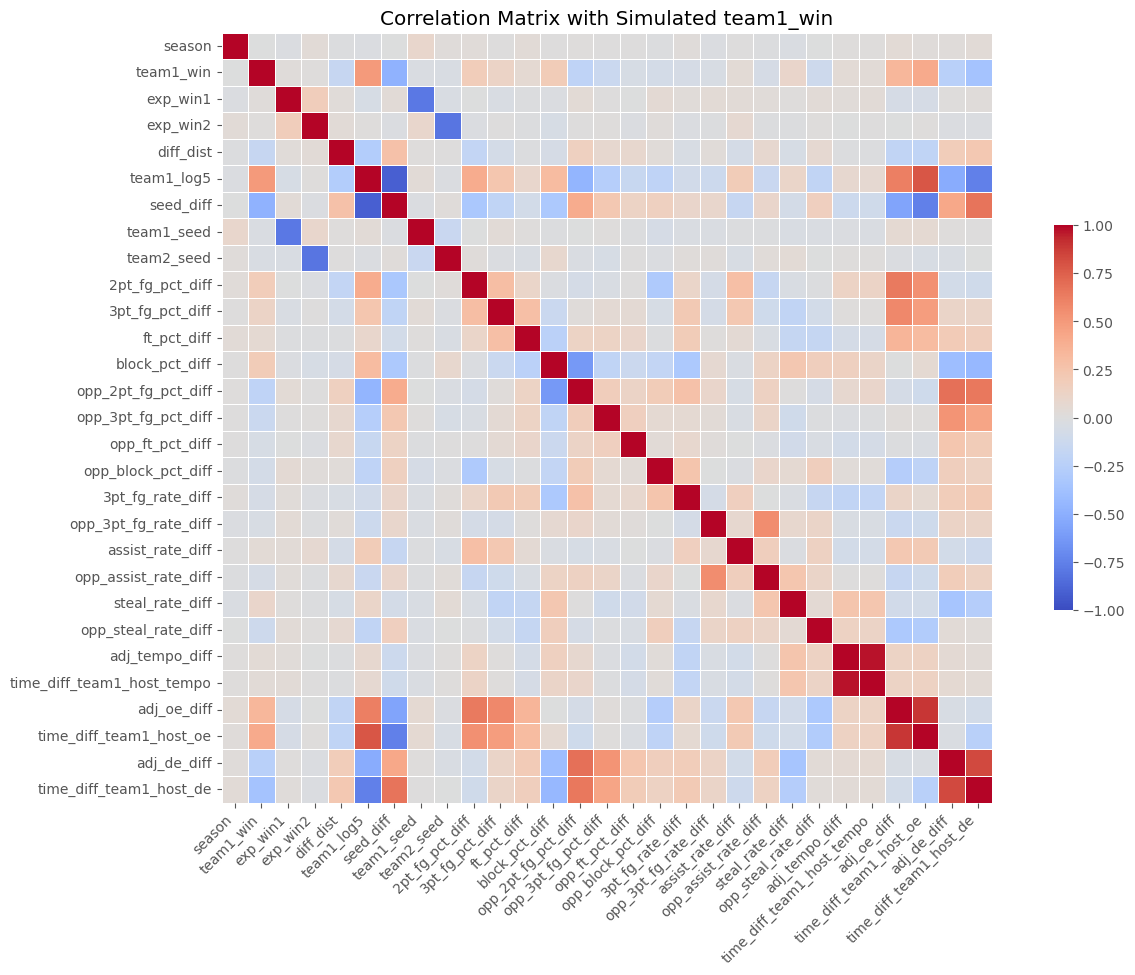

In [128]:

import seaborn as sns
import matplotlib.pyplot as plt

# Exclude the columns you don't want to include in the correlation matrix
columns_to_exclude = ['team1_score', 'team2_score', 'team1_id', 'team2_id', 'team_season_wins_diff',
 'team_season_losses_diff',
 'school_ncaa_appearances_diff',
 'coach_ncaa_appearances_diff',
 'school_s16_appearances_diff',
 'coach_s16_appearances_diff',
 'school_ff_appearances_diff',
 'coach_ff_appearances_diff',
 'coach_season_wins_diff',
 'coach_season_losses_diff',
 'coach_overall_wins_diff',
 'coach_overall_losses_diff']

mm_train_filtered = mm_train.drop(columns=columns_to_exclude)

# Calculate the correlation matrix for the filtered DataFrame
correlation_matrix = mm_train_filtered.corr(numeric_only=True)

# Make the plot bigger
plt.figure(figsize=(16, 10))  # Adjust the size accordingly

# Generate a heatmap without annotations
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Title and display settings
plt.title('Correlation Matrix with Simulated team1_win')
# Adjust the plot to make sure all labels are visible
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Save the figure if you want to use it in your reports
plt.savefig('March Madness Data Final/final_correlation_matrix.png', format='png', bbox_inches='tight')

plt.show()






In [129]:
# Assuming 'correlation_matrix' is your DataFrame that contains the correlation coefficients
correlations_with_team1_win = correlation_matrix['team1_win']

# Filter out the correlations that are greater than 0
positive_correlations = correlations_with_team1_win[correlations_with_team1_win > 0]

# Sort the positive correlations from highest to lowest
sorted_positive_correlations = positive_correlations.sort_values(ascending=False)

# This will give you a Pandas Series with the variable names as the index and the correlation coefficients as the values,
# sorted so that the variables most positively correlated with 'team1_win' are at the top.
sorted_positive_correlations


team1_win                     1.000000
team1_log5                    0.498891
time_diff_team1_host_oe       0.407876
adj_oe_diff                   0.335944
block_pct_diff                0.194061
2pt_fg_pct_diff               0.182346
3pt_fg_pct_diff               0.124645
steal_rate_diff               0.095618
ft_pct_diff                   0.061167
adj_tempo_diff                0.042658
assist_rate_diff              0.040638
time_diff_team1_host_tempo    0.037751
exp_win1                      0.015811
exp_win2                      0.015097
Name: team1_win, dtype: float64

In [177]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

correlated_features = ['team1_log5', 'time_diff_team1_host_oe',        
'adj_oe_diff',                                  
'block_pct_diff',                  
'2pt_fg_pct_diff',                        
'3pt_fg_pct_diff',                 
'steal_rate_diff',                       
'ft_pct_diff',                     
'adj_tempo_diff',                 
'assist_rate_diff',                
'time_diff_team1_host_tempo',                
'exp_win1',                        
'exp_win2']

# Define your features and target variable
X = mm_train[correlated_features]  # Use your actual correlated features
y = mm_train['team1_win']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)

# Initialize and fit the Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

# Initialize and fit the Logistic Regression
logreg_classifier = LogisticRegression(max_iter=1000, random_state=42)
logreg_classifier.fit(X_train, y_train)
logreg_predictions = logreg_classifier.predict(X_test)

# Initialize and fit the ANN (MLPClassifier)
ann_classifier = MLPClassifier(random_state=42, max_iter=1000)
ann_classifier.fit(X_train, y_train)
ann_predictions = ann_classifier.predict(X_test)

# Initialize and fit the XGBoost
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_classifier.fit(X_train, y_train)
xgb_predictions = xgb_classifier.predict(X_test)

# Evaluate all models
models = {
    'Decision Tree': dt_classifier,
    'Random Forest': rf_classifier,
    'Logistic Regression': logreg_classifier,
    'ANN': ann_classifier,
    'XGBoost': xgb_classifier
}

for model_name, model in models.items():
    predictions = model.predict(X_test)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions, average='macro')
    accuracy = accuracy_score(y_test, predictions)
    
    print(f"\n{model_name} Metrics:")
    print(classification_report(y_test, predictions))
    print("Accuracy:", accuracy_score(y_test, predictions))
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    


/Users/tuho/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Decision Tree Metrics:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       208
           1       0.91      0.90      0.91       186

    accuracy                           0.91       394
   macro avg       0.91      0.91      0.91       394
weighted avg       0.91      0.91      0.91       394

Accuracy: 0.9111675126903553
Precision: 0.91
Recall: 0.91
F1 Score: 0.91
Accuracy: 0.91

Random Forest Metrics:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       208
           1       0.90      0.91      0.91       186

    accuracy                           0.91       394
   macro avg       0.91      0.91      0.91       394
weighted avg       0.91      0.91      0.91       394

Accuracy: 0.9111675126903553
Precision: 0.91
Recall: 0.91
F1 Score: 0.91
Accuracy: 0.91

Logistic Regression Metrics:
              precision    recall  f1-score   support

           0       0.74      0.70    

In [178]:
from sklearn.metrics import roc_auc_score

# Assuming y_test is your test set's true labels
# and you already have predictions from each model (if not, you'll need to generate these predictions)

# For models that output probabilities (Logistic Regression, Random Forest, XGBoost, ANN),
# ensure you're using the probability predictions for class 1 (win)
# For example: rf_probs = rf_classifier.predict_proba(X_test)[:, 1]

# Generate probability predictions for models that support predict_proba
dt_probs = dt_classifier.predict_proba(X_test)[:, 1]
rf_probs = rf_classifier.predict_proba(X_test)[:, 1]
logreg_probs = logreg_classifier.predict_proba(X_test)[:, 1]
ann_probs = ann_classifier.predict_proba(X_test)[:, 1]
xgb_probs = xgb_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC AUC scores
dt_roc_auc = roc_auc_score(y_test, dt_probs)
rf_roc_auc = roc_auc_score(y_test, rf_probs)
logreg_roc_auc = roc_auc_score(y_test, logreg_probs)
ann_roc_auc = roc_auc_score(y_test, ann_probs)
xgb_roc_auc = roc_auc_score(y_test, xgb_probs)

# Print ROC AUC scores
print(f"Decision Tree ROC AUC: {dt_roc_auc:.4f}")
print(f"Random Forest ROC AUC: {rf_roc_auc:.4f}")
print(f"Logistic Regression ROC AUC: {logreg_roc_auc:.4f}")
print(f"ANN ROC AUC: {ann_roc_auc:.4f}")
print(f"XGBoost ROC AUC: {xgb_roc_auc:.4f}")


Decision Tree ROC AUC: 0.9107
Random Forest ROC AUC: 0.9661
Logistic Regression ROC AUC: 0.8007
ANN ROC AUC: 0.7812
XGBoost ROC AUC: 0.9856


In [179]:
# Assuming X_train, X_test, y_train, y_test are already defined and the models are trained

# For Decision Tree
dt_probs = dt_classifier.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# For Random Forest
rf_probs = rf_classifier.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# For Logistic Regression
logreg_probs = logreg_classifier.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# For ANN (MLPClassifier)
# Ensure your ANN model is set up to output probabilities
ann_probs = ann_classifier.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# For XGBoost
xgb_probs = xgb_classifier.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Create a DataFrame to summarize the first 5 probability predictions
prob_summary = pd.DataFrame({
    'Decision Tree': dt_probs[:5],
    'Random Forest': rf_probs[:5],
    'Logistic Regression': logreg_probs[:5],
    'ANN': ann_probs[:5],
    'XGBoost': xgb_probs[:5]
})

print(prob_summary)


   Decision Tree  Random Forest  Logistic Regression       ANN   XGBoost
0            0.0           0.02             0.219749  0.001437  0.000196
1            1.0           0.50             0.519396  0.702365  0.914509
2            1.0           0.95             0.819901  0.951565  0.999684
3            0.0           0.32             0.353351  0.249590  0.005889
4            1.0           0.66             0.468283  0.902206  0.964418


In [180]:
from sklearn.metrics import log_loss

# Calculate and print log loss for each model
dt_log_loss = log_loss(y_test, dt_probs)
print(f"Decision Tree Log Loss: {dt_log_loss:.4f}")

rf_log_loss = log_loss(y_test, rf_probs)
print(f"Random Forest Log Loss: {rf_log_loss:.4f}")

logreg_log_loss = log_loss(y_test, logreg_probs)
print(f"Logistic Regression Log Loss: {logreg_log_loss:.4f}")

ann_log_loss = log_loss(y_test, ann_probs)
print(f"ANN Log Loss: {ann_log_loss:.4f}")

xgb_log_loss = log_loss(y_test, xgb_probs)
print(f"XGBoost Log Loss: {xgb_log_loss:.4f}")


Decision Tree Log Loss: 3.2018
Random Forest Log Loss: 0.3405
Logistic Regression Log Loss: 0.5397
ANN Log Loss: 0.7505
XGBoost Log Loss: 0.1552


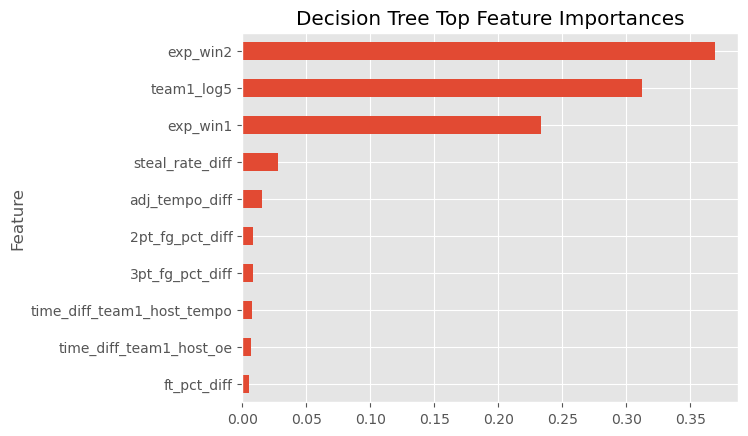

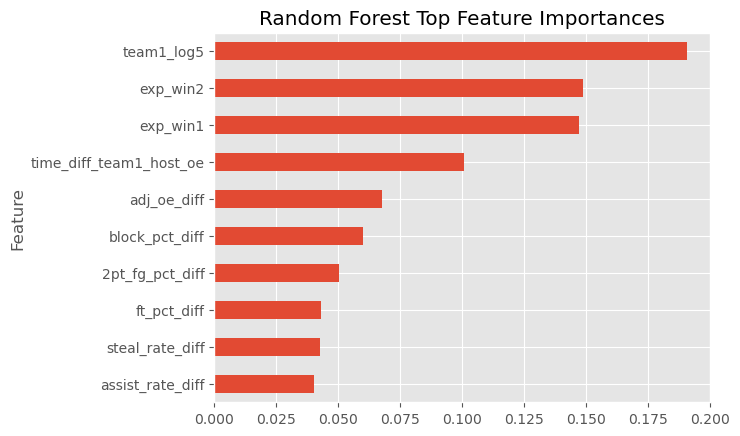

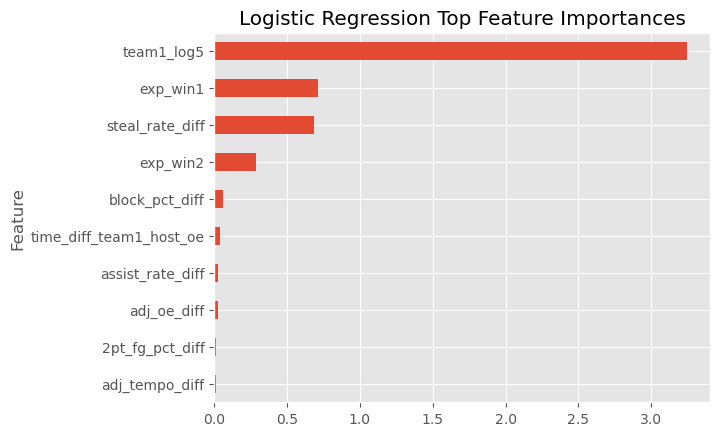

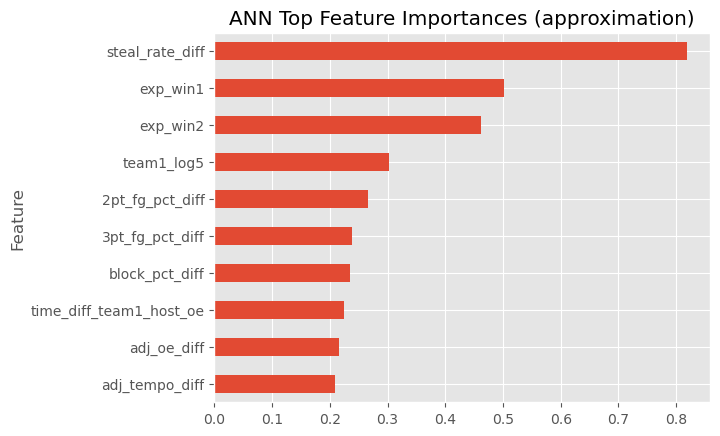

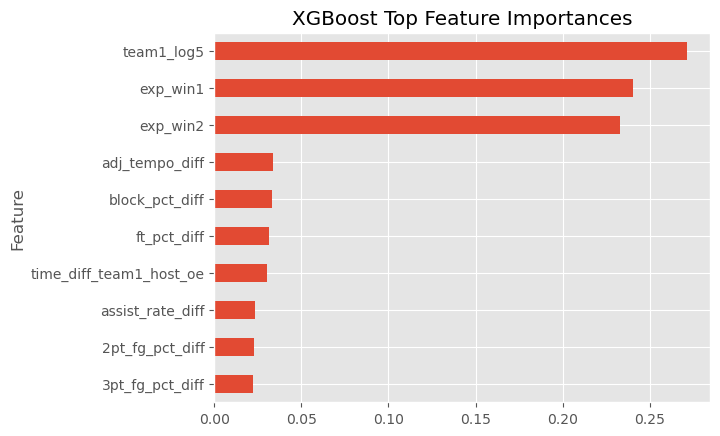

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to get feature importance for models that have the 'feature_importances_' attribute
def get_feature_importances(model, feature_names):
    importance = model.feature_importances_
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    return importance_df.sort_values('Importance', ascending=False)

# Function to get feature importance for Logistic Regression based on coefficients
def get_logistic_regression_importance(model, feature_names):
    importance = np.abs(model.coef_[0])
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    return importance_df.sort_values('Importance', ascending=False)

# ANN feature importance is not as straightforward but we can get an approximation
def get_ann_importance(ann_model, feature_names):
    # Get the mean absolute value of the weights for the first layer
    importance = np.mean(np.abs(ann_model.coefs_[0]), axis=1)
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    return importance_df.sort_values('Importance', ascending=False)

# Assuming 'dt_classifier', 'rf_classifier', 'logreg_classifier', 'ann_classifier', and 'xgb_classifier' 
# are already trained and 'X' is your features DataFrame

feature_names = X.columns.tolist()

# Get feature importances for all models
dt_importance_df = get_feature_importances(dt_classifier, feature_names)
rf_importance_df = get_feature_importances(rf_classifier, feature_names)
logreg_importance_df = get_logistic_regression_importance(logreg_classifier, feature_names)
ann_importance_df = get_ann_importance(ann_classifier, feature_names)
xgb_importance_df = get_feature_importances(xgb_classifier, feature_names)

# Function to plot the feature importances
def plot_feature_importance(importance_df, title, max_features=10):
    importance_df.head(max_features).plot(kind='barh', x='Feature', y='Importance', legend=False)
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.show()

# Plot the feature importances
plot_feature_importance(dt_importance_df, 'Decision Tree Top Feature Importances')
plot_feature_importance(rf_importance_df, 'Random Forest Top Feature Importances')
plot_feature_importance(logreg_importance_df, 'Logistic Regression Top Feature Importances')
plot_feature_importance(ann_importance_df, 'ANN Top Feature Importances (approximation)')
plot_feature_importance(xgb_importance_df, 'XGBoost Top Feature Importances')


In [182]:
xgb_importance_df.to_excel('dt_feature_importance_notcoach.xlsx', index=False)

# 2023 data

In [ ]:
mm_data = pd.read_csv('March Madness Data Final/NCAA_Tourney_2023 - NCAA_Tourney_2023.csv')


# Coach Winning Probability

In [167]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

correlated_features_coach = ['team_season_wins_diff',
 'team_season_losses_diff',
 'school_ncaa_appearances_diff',
 'coach_ncaa_appearances_diff',
 'school_s16_appearances_diff',
 'coach_s16_appearances_diff',
 'school_ff_appearances_diff',
 'coach_ff_appearances_diff',
 'coach_season_wins_diff',
 'coach_season_losses_diff',
 'coach_overall_wins_diff',
 'coach_overall_losses_diff',]

# Define your features and target variable
X = mm_train[correlated_features_coach]  # Use your actual correlated features
y = mm_train['team1_win']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)

# Initialize and fit the Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

# Initialize and fit the Logistic Regression
logreg_classifier = LogisticRegression(max_iter=1000, random_state=42)
logreg_classifier.fit(X_train, y_train)
logreg_predictions = logreg_classifier.predict(X_test)

# Initialize and fit the ANN (MLPClassifier)
ann_classifier = MLPClassifier(random_state=42, max_iter=1000)
ann_classifier.fit(X_train, y_train)
ann_predictions = ann_classifier.predict(X_test)

# Initialize and fit the XGBoost
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_classifier.fit(X_train, y_train)
xgb_predictions = xgb_classifier.predict(X_test)

# Evaluate all models
models = {
    'Decision Tree': dt_classifier,
    'Random Forest': rf_classifier,
    'Logistic Regression': logreg_classifier,
    'ANN': ann_classifier,
    'XGBoost': xgb_classifier
}

for model_name, model in models.items():
    predictions = model.predict(X_test)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions, average='macro')
    accuracy = accuracy_score(y_test, predictions)
    
    print(f"\n{model_name} Metrics:")
    print(classification_report(y_test, predictions))
    print("Accuracy:", accuracy_score(y_test, predictions))
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    


Decision Tree Metrics:
              precision    recall  f1-score   support

           0       0.62      0.51      0.56       208
           1       0.54      0.65      0.59       186

    accuracy                           0.58       394
   macro avg       0.58      0.58      0.58       394
weighted avg       0.58      0.58      0.57       394

Accuracy: 0.5761421319796954
Precision: 0.58
Recall: 0.58
F1 Score: 0.58
Accuracy: 0.58

Random Forest Metrics:
              precision    recall  f1-score   support

           0       0.65      0.64      0.65       208
           1       0.61      0.62      0.61       186

    accuracy                           0.63       394
   macro avg       0.63      0.63      0.63       394
weighted avg       0.63      0.63      0.63       394

Accuracy: 0.6294416243654822
Precision: 0.63
Recall: 0.63
F1 Score: 0.63
Accuracy: 0.63

Logistic Regression Metrics:
              precision    recall  f1-score   support

           0       0.71      0.63    

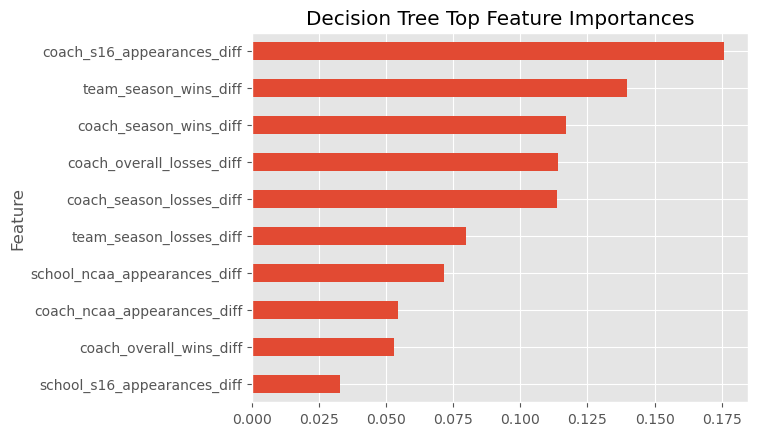

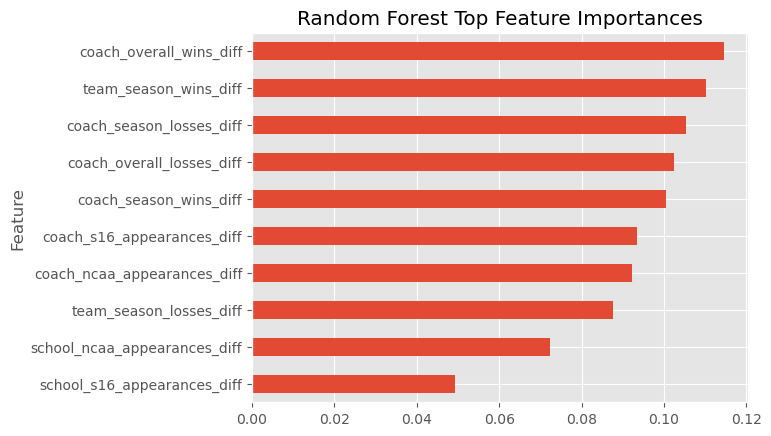

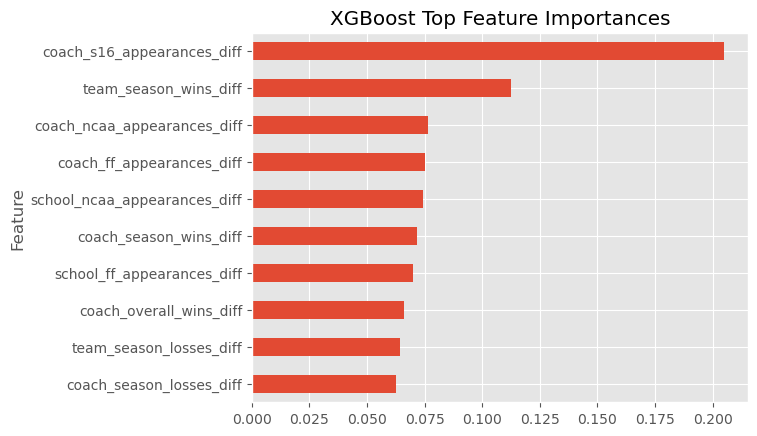

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to get feature importance for models that have the 'feature_importances_' attribute
def get_feature_importances_coach(model, feature_names):
    importance = model.feature_importances_
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    return importance_df.sort_values('Importance', ascending=False)


# Assuming 'dt_classifier', 'rf_classifier', 'logreg_classifier', 'ann_classifier', and 'xgb_classifier' 
# are already trained and 'X' is your features DataFrame

feature_names = X.columns.tolist()

# Get feature importances for all models
dt_importance_df = get_feature_importances(dt_classifier, feature_names)
rf_importance_df = get_feature_importances(rf_classifier, feature_names)
xgb_importance_df = get_feature_importances(xgb_classifier, feature_names)

# Function to plot the feature importances
def plot_feature_importance(importance_df, title, max_features=10):
    importance_df.head(max_features).plot(kind='barh', x='Feature', y='Importance', legend=False)
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.show()

# Plot the feature importances
plot_feature_importance(dt_importance_df, 'Decision Tree Top Feature Importances')
plot_feature_importance(rf_importance_df, 'Random Forest Top Feature Importances')
plot_feature_importance(xgb_importance_df, 'XGBoost Top Feature Importances')



In [173]:
#Write to excel
dt_importance_df.to_excel('dt_feature_importance.xlsx', index=False)
rf_importance_df.to_excel('rf_feature_importance.xlsx', index=False)
xgb_importance_df.to_excel('xgb_feature_importance.xlsx', index=False)

# Final Four Predictions

In [168]:
# Define the Elite Eight teams and the year of interest
elite_eight_teams = ['Miami FL', 'Kansas', 'Villanova', 'North Carolina', 'Duke', 'Arkansas', 'St Peter\'s', 'Houston']
season_year = 2022

# Assuming 'mm_data' contains columns for each statistic and team identifiers
# Let's also assume 'team_name' is the column that identifies the team
# And 'season' is the column that identifies the year

# Filter 'mm_data' for the Elite Eight teams and the 2022 season
elite_eight_stats_2022 = mm_data[(mm_data['team1_teamname'].isin(elite_eight_teams)) & (mm_data['season'] == season_year)]

# Now, 'elite_eight_stats_2022' should have the rows corresponding to the Elite Eight teams in 2022
# Assuming you have one row per team and per statistic, you would then extract the statistics for each team

# This will create a dictionary for each team with their statistics
elite_eight_team_stats = {team: {} for team in elite_eight_teams}
for team in elite_eight_teams:
    team_data = elite_eight_stats_2022[elite_eight_stats_2022['team1_teamname'] == team]
    if not team_data.empty:
        # Assuming that 'team_data' has one row per team, we can use iloc[0] to get the series of statistics
        # Replace 'team1_log5', 'time_diff_team1_host_oe', etc., with the actual column names from 'mm_data'
        elite_eight_team_stats[team]['team1_log5'] = team_data['team1_log5'].iloc[0]
        elite_eight_team_stats[team]['time_diff_team1_host_oe'] = team_data['time_diff_team1_host_oe'].iloc[0]
        elite_eight_team_stats[team]['adj_oe_diff'] = team_data['adj_oe_diff'].iloc[0]
        elite_eight_team_stats[team]['block_pct_diff'] = team_data['block_pct_diff'].iloc[0]
        elite_eight_team_stats[team]['2pt_fg_pct_diff'] = team_data['2pt_fg_pct_diff'].iloc[0]
        elite_eight_team_stats[team]['3pt_fg_pct_diff'] = team_data['3pt_fg_pct_diff'].iloc[0]
        elite_eight_team_stats[team]['steal_rate_diff'] = team_data['steal_rate_diff'].iloc[0]
        elite_eight_team_stats[team]['ft_pct_diff'] = team_data['ft_pct_diff'].iloc[0]
        elite_eight_team_stats[team]['adj_tempo_diff'] = team_data['adj_tempo_diff'].iloc[0]
        elite_eight_team_stats[team]['assist_rate_diff'] = team_data['assist_rate_diff'].iloc[0]
        elite_eight_team_stats[team]['time_diff_team1_host_tempo'] = team_data['time_diff_team1_host_tempo'].iloc[0]
        elite_eight_team_stats[team]['exp_win1'] = team_data['exp_win1'].iloc[0]
        elite_eight_team_stats[team]['exp_win2'] = team_data['exp_win2'].iloc[0]

# You can now use the 'elite_eight_team_stats' dictionary to access the stats for each team
# For example, to get the 'team1_log5' for Miami:
#miami_log5 = elite_eight_team_stats['Miami']['team1_log5']
# Now you have a dictionary 'elite_eight_team_stats' with all the stats for each team
# Here's how to print them all out
for team, stats in elite_eight_team_stats.items():
    print(f"Stats for {team}:")
    for stat_name, value in stats.items():
        print(f"  {stat_name}: {value}")
    print("\n")

Stats for Miami FL:
  team1_log5: 0.42324463592167666
  time_diff_team1_host_oe: 10.40400000000001
  adj_oe_diff: 12.274599999999992
  block_pct_diff: -0.9983284789328106
  2pt_fg_pct_diff: 3.941611190943995
  3pt_fg_pct_diff: 3.1479864398470028
  steal_rate_diff: 0.004231684105443986
  ft_pct_diff: 5.927277862877403
  adj_tempo_diff: 0.3106999999999971
  assist_rate_diff: -9.197409733124005
  time_diff_team1_host_tempo: 1.2109000000000094
  exp_win1: 0.7925448100042692
  exp_win2: 0.8388642251526164


Stats for Kansas:
  team1_log5: 0.5327115572392955
  time_diff_team1_host_oe: 1.4669999999999987
  adj_oe_diff: -1.2399999999999949
  block_pct_diff: 3.32184960471983
  2pt_fg_pct_diff: 4.1626053978258994
  3pt_fg_pct_diff: -0.38011695906430276
  steal_rate_diff: -0.005657005891938807
  ft_pct_diff: -9.892396440887211
  adj_tempo_diff: 5.357900000000001
  assist_rate_diff: 4.886659046539997
  time_diff_team1_host_tempo: 6.551699999999997
  exp_win1: 0.9405648786564433
  exp_win2: 0.93280

In [161]:
import pandas as pd
import numpy as np

# Assuming you have:
# 1. elite_eight_team_stats: A dictionary with all stats for each team.
# 2. xgb_classifier: Your trained XGBoost model.
# 3. correlated_features: A list of features used in your model.

selected_feature = {'team1_log5',
  'time_diff_team1_host_oe',
  'adj_oe_diff',
  'block_pct_diff',
  '2pt_fg_pct_diff',
  '3pt_fg_pct_diff',
  'steal_rate_diff',
  'ft_pct_diff',
  'adj_tempo_diff',
  'assist_rate_diff',
  'time_diff_team1_host_tempo',
  'exp_win1',
  'exp_win2'}


# Define the matchups
matchups = [
    ('Miami FL', 'Kansas'),
    ('Houston', 'Villanova'),
    ('St Peter\'s', 'North Carolina'),
    ('Arkansas', 'Duke')
]

# Prepare a DataFrame to hold the feature differences for each matchup
matchup_diffs = []

for team1_name, team2_name in matchups:
    # Initialize a dictionary to hold the differences
    matchup_features_diff = {}
    
    # Loop through each feature to calculate the difference
    for feature in correlated_features:
        # Calculate the difference between team1 and team2 for the current feature
        # Ensure you handle missing stats with a default value, e.g., 0 or the mean of that feature across teams
        team1_stat = elite_eight_team_stats.get(team1_name, {}).get(feature, np.nan)
        team2_stat = elite_eight_team_stats.get(team2_name, {}).get(feature, np.nan)
        
        # Calculate the difference
        feature_diff = team1_stat - team2_stat
        
        # Add the difference to the matchup_features_diff dictionary
        matchup_features_diff[feature] = feature_diff
    
    # Add the calculated differences to the matchup_diffs list
    matchup_diffs.append(matchup_features_diff)

# Convert the list of differences to a DataFrame
matchup_diffs_df = pd.DataFrame(matchup_diffs)

# Handle any NaN values in matchup_diffs_df before prediction
# For example, you could fill NaNs with 0 or the mean of each column
# matchup_diffs_df.fillna(0, inplace=True)

# Predict using the XGBoost model
matchup_diffs_df['team1_prob_win'] = xgb_classifier.predict_proba(matchup_diffs_df)[:, 1]
matchup_diffs_df['team1_predicted_to_win'] = (matchup_diffs_df['team1_prob_win'] > 0.5).astype(int)

# Determine the winners based on the predictions
final_four_teams = [matchups[i][0] if winner else matchups[i][1] for i, winner in enumerate(matchup_diffs_df['team1_predicted_to_win'])]

print("Predicted Final Four teams:", final_four_teams)


Predicted Final Four teams: ['Kansas', 'Villanova', 'North Carolina', 'Duke']


In [159]:
import pandas as pd

# Assuming you have already defined 'elite_eight_team_stats' with the correct statistics

selected_feature = {'team1_log5',
  'time_diff_team1_host_oe',
  'adj_oe_diff',
  'block_pct_diff',
  '2pt_fg_pct_diff',
  '3pt_fg_pct_diff',
  'steal_rate_diff',
  'ft_pct_diff',
  'adj_tempo_diff',
  'assist_rate_diff',
  'time_diff_team1_host_tempo',
  'exp_win1',
  'exp_win2'}

# Define the matchups for the Elite Eight
matchups = [
    ('Miami FL', 'Kansas'),
    ('Houston', 'Villanova'),
    ('St Peter\'s', 'North Carolina'),
    ('Arkansas', 'Duke')
]

# Initialize an empty DataFrame for storing features for prediction
matchup_features_list = []

# Calculate differences in features for each matchup
for team1_name, team2_name in matchups:
    team1_stats = elite_eight_team_stats[team1_name]
    team2_stats = elite_eight_team_stats[team2_name]
    
    # Calculate the difference between each team's stats for the features used by your model
    matchup_features = {feature: team1_stats[feature] - team2_stats[feature] for feature in selected_feature}
    
    # Add the matchup features to the list
    matchup_features_list.append(matchup_features)

# Create a DataFrame from the list of matchup features
matchup_df = pd.DataFrame(matchup_features_list)

# Assuming 'xgb_classifier' is your trained XGBoost model
# Predict the outcome of each matchup
matchup_df['team1_prob_win'] = xgb_classifier.predict_proba(matchup_df)[:, 1]
matchup_df['team1_predicted_to_win'] = (matchup_df['team1_prob_win'] > 0.5).astype(int)

# Print the predicted probabilities and outcomes
print(matchup_df[['team1_prob_win', 'team1_predicted_to_win']])

# Determine the winners and the Final Four teams
final_four_teams = []
for i, matchup in enumerate(matchups):
    winner = matchup[0] if matchup_df.iloc[i]['team1_predicted_to_win'] == 1 else matchup[1]
    final_four_teams.append(winner)

# Print the Final Four teams
print("The predicted Final Four teams are:", final_four_teams)


ValueError: feature_names mismatch: ['team1_log5', 'time_diff_team1_host_oe', 'adj_oe_diff', 'block_pct_diff', '2pt_fg_pct_diff', '3pt_fg_pct_diff', 'steal_rate_diff', 'ft_pct_diff', 'adj_tempo_diff', 'assist_rate_diff', 'time_diff_team1_host_tempo', 'exp_win1', 'exp_win2'] ['assist_rate_diff', 'exp_win2', 'time_diff_team1_host_tempo', 'exp_win1', 'adj_tempo_diff', 'ft_pct_diff', 'team1_log5', 'steal_rate_diff', 'block_pct_diff', '2pt_fg_pct_diff', 'time_diff_team1_host_oe', 'adj_oe_diff', '3pt_fg_pct_diff']

In [147]:
import pandas as pd

num_teams = 8  # The number of teams in your Elite Eight
# Assuming 'elite_eight_team_stats' is a dictionary containing the stats
# Replace 'dummy_value' with actual values from 'elite_eight_team_stats' dictionary

# Here you create a DataFrame with actual stats for each team
all_season_stats = pd.DataFrame({
    'season': [2022] * num_teams,
    'team_name': ['Miami FL', 'Kansas', 'Villanova', 'North Carolina', 'Duke', 'Arkansas', 'St Peter\'s', 'Houston'],
    'team1_log5': [elite_eight_team_stats[team]['team1_log5'] for team in ['Miami FL', 'Kansas', 'Villanova', 'North Carolina', 'Duke', 'Arkansas', 'St Peter\'s', 'Houston']],
    'time_diff_team1_host_oe': [elite_eight_team_stats[team]['time_diff_team1_host_oe'] for team in ['Miami FL', 'Kansas', 'Villanova', 'North Carolina', 'Duke', 'Arkansas', 'St Peter\'s', 'Houston']],
    'adj_oe_diff': [elite_eight_team_stats[team]['adj_oe_diff'] for team in ['Miami FL', 'Kansas', 'Villanova', 'North Carolina', 'Duke', 'Arkansas', 'St Peter\'s', 'Houston']],
    'block_pct_diff': [elite_eight_team_stats[team]['block_pct_diff'] for team in ['Miami FL', 'Kansas', 'Villanova', 'North Carolina', 'Duke', 'Arkansas', 'St Peter\'s', 'Houston']],
    '2pt_fg_pct_diff': [elite_eight_team_stats[team]['2pt_fg_pct_diff'] for team in ['Miami FL', 'Kansas', 'Villanova', 'North Carolina', 'Duke', 'Arkansas', 'St Peter\'s', 'Houston']],
    '3pt_fg_pct_diff': [elite_eight_team_stats[team]['3pt_fg_pct_diff'] for team in ['Miami FL', 'Kansas', 'Villanova', 'North Carolina', 'Duke', 'Arkansas', 'St Peter\'s', 'Houston']],
    'steal_rate_diff': [elite_eight_team_stats[team]['steal_rate_diff'] for team in ['Miami FL', 'Kansas', 'Villanova', 'North Carolina', 'Duke', 'Arkansas', 'St Peter\'s', 'Houston']],
    'ft_pct_diff': [elite_eight_team_stats[team]['ft_pct_diff'] for team in ['Miami FL', 'Kansas', 'Villanova', 'North Carolina', 'Duke', 'Arkansas', 'St Peter\'s', 'Houston']],
    'adj_tempo_diff': [elite_eight_team_stats[team]['adj_tempo_diff'] for team in ['Miami FL', 'Kansas', 'Villanova', 'North Carolina', 'Duke', 'Arkansas', 'St Peter\'s', 'Houston']],
    'assist_rate_diff': [elite_eight_team_stats[team]['assist_rate_diff'] for team in ['Miami FL', 'Kansas', 'Villanova', 'North Carolina', 'Duke', 'Arkansas', 'St Peter\'s', 'Houston']],
    'time_diff_team1_host_tempo': [elite_eight_team_stats[team]['time_diff_team1_host_tempo'] for team in ['Miami FL', 'Kansas', 'Villanova', 'North Carolina', 'Duke', 'Arkansas', 'St Peter\'s', 'Houston']],
    'exp_win1': [elite_eight_team_stats[team]['exp_win1'] for team in ['Miami FL', 'Kansas', 'Villanova', 'North Carolina', 'Duke', 'Arkansas', 'St Peter\'s', 'Houston']],
    'exp_win2': [elite_eight_team_stats[team]['exp_win2'] for team in ['Miami FL', 'Kansas', 'Villanova', 'North Carolina', 'Duke', 'Arkansas', 'St Peter\'s', 'Houston']],
    
})

# Now, assuming 'elite_eight_team_stats' is correctly populated with each team's stats,
# 'all_season_stats' will have the correct stats and you can filter by season if needed
season_stats = all_season_stats[all_season_stats['season'] == 2022].drop('season', axis=1)


In [156]:
# Define the get_team_stats function
def get_team_stats(team_name):
    team_stats = season_stats[season_stats['team_name'] == team_name]
    if not team_stats.empty:
        team_stats = team_stats.iloc[0]  # Retrieve the first row if there are multiple rows for a team
    return team_stats

# Define the matchups for the Elite Eight
matchups = [
    ('Miami', 'Kansas'),
    ('Houston', 'Villanova'),
    ('Saint Peter\'s', 'UNC'),
    ('Arkansas', 'Duke')
]

selected_feature = {'team1_log5',
  'time_diff_team1_host_oe',
  'adj_oe_diff',
  'block_pct_diff',
  '2pt_fg_pct_diff',
  '3pt_fg_pct_diff',
  'steal_rate_diff',
  'ft_pct_diff',
  'adj_tempo_diff',
  'assist_rate_diff',
  'time_diff_team1_host_tempo',
  'exp_win1',
  'exp_win2'}

predicted_final_four = []

# Get the stats for each team and calculate differences
for team1_name, team2_name in matchups:
    team1_stats = get_team_stats(team1_name)
    team2_stats = get_team_stats(team2_name)
    
    # Calculate the differences and ensure all values are numeric
    matchup_features = {}
    for feature in selected_feature:
        # Convert to float, and handle any conversion issues (like if the value cannot be converted to a float)
        try:
            team1_stat = float(team1_stats[feature])
            team2_stat = float(team2_stats[feature])
            matchup_features[feature] = team1_stat - team2_stat
        except ValueError:
            # Handle the error, perhaps by setting a default value or by skipping the feature
            print(f"Could not convert {feature} to float. Using default value 0.")
            matchup_features[feature] = 0.0
    
    elite_eight_features.append(matchup_features)
    
   # Create a DataFrame from the list of matchup features
elite_eight_df = pd.DataFrame(elite_eight_features)

# Assuming 'xgb_classifier' is your trained XGBoost model
# Predict the outcome of each matchup
try:
    elite_eight_df['team1_prob_win'] = xgb_classifier.predict_proba(elite_eight_df[selected_feature])[:, 1]
    elite_eight_df['team1_predicted_to_win'] = (elite_eight_df['team1_prob_win'] > 0.5).astype(int)
except ValueError as e:
    print("Prediction error:", e)
    # Handle the prediction error, perhaps by skipping the prediction or using a default value

# Display the predictions
print(elite_eight_df[['team1_prob_win', 'team1_predicted_to_win']]) 

TypeError: cannot convert the series to <class 'float'>

In [145]:
# Example DataFrame holding each team's statistics for the 2022 season
# This should be populated with real data.
all_season_stats = pd.DataFrame({
    'season': ['season'],
    'team_name': ['Miami','Kansas', 'Villanova', 'UNC', 'Duke', 'Arkansas', 'St Peter\'s'],  # The team names
    'team1_log5': ['Team\'s log5 value'],  # Team\'s log5 value
    'time_diff_team1_host_oe': ['Time Difference Team 1 to Host (oe)'],  # Time difference feature for offensive efficiency
    'adj_oe_diff': ['Adjusted Offensive Efficiency Difference'],  # Adjusted offensive efficiency difference
    'block_pct_diff': ['Block % Difference'],  # Block percentage difference
    '2pt_fg_pct_diff': ['2 PT FG % Difference'],  # Two-point field goal percentage difference
    '3pt_fg_pct_diff': ['3 PT FG % Difference'],  # Three-point field goal percentage difference
    'steal_rate_diff': ['Steal Rate Difference'],  # Steal rate difference
    'ft_pct_diff': ['Free Throw % Difference'],  # Free throw percentage difference
    'adj_tempo_diff': ['Adjusted Tempo Difference'],  # Adjusted tempo difference
    'assist_rate_diff': ['Assist Rate Difference'],  # Assist rate difference
    'time_diff_team1_host_tempo': ['Time Difference Team 1 to Host (tempo)'],  # Time difference for tempo
    'exp_win1': ['Expected win probability for team1'],  # Expected win probability for team1
    'exp_win2': ['Expected win probability for team2']
})

# Filter out the statistics for the 2022 season
season_stats = all_season_stats[all_season_stats['season'] == 2022].drop('season', axis=1)

def get_team_stats(team_name):
    # Retrieve the row from the season_stats DataFrame for the given team
    team_stats = season_stats[season_stats['team_name'] == team_name]
    
    # If your stats are in the form of a DataFrame, you might need to squeeze it into a Series
    if not team_stats.empty:
        team_stats = team_stats.squeeze()
    
    return team_stats

# Names of teams in the Elite Eight round
matchups = [
    ('Miami FL', 'Kansas'),
    ('Houston', 'Villanova'),
    ('Saint Peter', 'UNC'),
    ('Arkansas', 'Duke')
]
# Now you can use this function to get the statistics for each team in the matchups
#for matchup in matchups:
    #team1_name, team2_name = matchup
    #team1_stats = get_team_stats(team1_name)
    #team2_stats = get_team_stats(team2_name)
    
    # You would then calculate the differences between the teams' stats as needed
    # For example, if 'fg2pct' is one of the stats:
    #fg2pct_diff = team1_stats['fg2pct'] - team2_stats['fg2pct']
    # Repeat for all other stats
    


# Initialize an empty list to store matchup features
elite_eight_features = []

for team1_name, team2_name in matchups:
    # Retrieve the stats for each team
    team1_stats = get_team_stats(team1_name, season=2022)
    team2_stats = get_team_stats(team2_name, season=2022)

    # Calculate the differences in stats for the features your model uses
    matchup_features = {feature: team1_stats[feature] - team2_stats[feature] for feature in correlated_features}
    
    # Append to your elite_eight_features list
    elite_eight_features.append(matchup_features)

# Convert the list to a DataFrame
elite_eight_df = pd.DataFrame(elite_eight_features)

# Predict the outcome of each matchup using your trained model
# Here, I assume that your model outputs probabilities and you use 0.5 as the threshold
elite_eight_df['team1_prob_win'] = xgb_classifier.predict_proba(elite_eight_df)[:, 1]
elite_eight_df['team1_predicted_to_win'] = (elite_eight_df['team1_prob_win'] > 0.5).astype(int)

print(elite_eight_df[['team1_prob_win', 'team1_predicted_to_win']])

# Since the elite_eight_df now contains the predictions, you can compare it with the actual outcomes
# to validate your model's performance.


ValueError: All arrays must be of the same length

## Initial Check

In [82]:
train.groupby('team1_win')['team1_log5'].mean()

team1_win
0    0.379867
1    0.604904
Name: team1_log5, dtype: float64

In [83]:
train.groupby('team1_win')['seed_diff'].mean()

team1_win
0    3.612159
1   -3.235294
Name: seed_diff, dtype: float64

In [84]:
train.groupby('team1_win')['diff_dist'].mean()

team1_win
0    192.906632
1   -170.372016
Name: diff_dist, dtype: float64

## Train Logit

In [38]:
logit = LogisticRegression()
logit.fit(X=train[['seed_diff']], y=train['team1_win'])

LogisticRegression()

In [39]:
seed_smlogit = smf.logit("team1_win ~ seed_diff", train).fit()
seed_smlogit.summary()

Optimization terminated successfully.
         Current function value: 0.557630
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              team1_win   No. Observations:                  919
Model:                          Logit   Df Residuals:                      917
Method:                           MLE   Df Model:                            1
Date:                Thu, 28 Mar 2024   Pseudo R-squ.:                  0.1955
Time:                        01:42:00   Log-Likelihood:                -512.46
converged:                       True   LL-Null:                       -637.00
Covariance Type:            nonrobust   LLR p-value:                 4.121e-56
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0039      0.076      0.051      0.959      -0.145       0.153
seed_diff     -0.1662      0.012    -13.392      0.000      -0.190      -0.142
==============================================================================
"""

In [40]:
test['prob'] = logit.predict_proba(test[['seed_diff']])[:,1]
test['prediction'] = logit.predict(test[['seed_diff']])

In [41]:
test[['game_id','seed_diff','team1_win','prob','prediction']].head()

,game_id,seed_diff,team1_win,prob,prediction
0,2016-1433-1328,8,0,0.209965,0
1,2017-1376-1266,-3,1,0.623000,1
2,2022-1103-1417,9,0,0.183732,0
3,2014-1338-1196,8,0,0.209965,0
4,2002-1228-1166,-8,1,0.791329,1


In [42]:
test.groupby('team1_win')['prob'].mean()

team1_win
0    0.384551
1    0.607536
Name: prob, dtype: float64

<Axes: xlabel='prob', ylabel='team1_log5'>

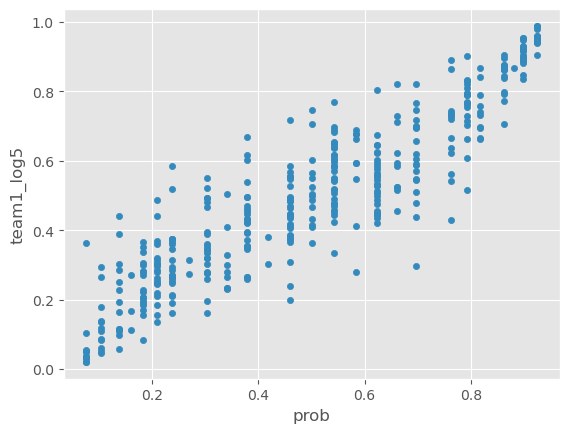

In [43]:
test.plot(kind='scatter', x='prob',y='team1_log5')

In [44]:
confusion_matrix(test['team1_win'], test['prediction'])

array([[131,  66],
       [ 59, 138]])

In [45]:
accuracy_score(test['team1_win'], test['prediction'],)

0.682741116751269

In [46]:
precision_score(test['team1_win'], test['prediction'])

0.6764705882352942

In [47]:
recall_score(test['team1_win'], test['prediction'])

0.700507614213198

In [48]:
f1_score(test['team1_win'], test['prediction'])

0.688279301745636

In [49]:
log_loss(test['team1_win'].values, test['prob'].values, labels=[0,1])

0.5873995659440282

In [45]:
def plot_roc(fpr, tpr, roc_auc):
    """Plots the ROC curve for the win probability model along with
    the AUC.
    """
    fig, ax = plt.subplots()
    ax.set(title='Receiver Operating Characteristic',
           xlim=[0, 1], ylim=[0, 1], xlabel='False Positive Rate',
           ylabel='True Positive Rate')
    ax.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.legend(loc='lower right')

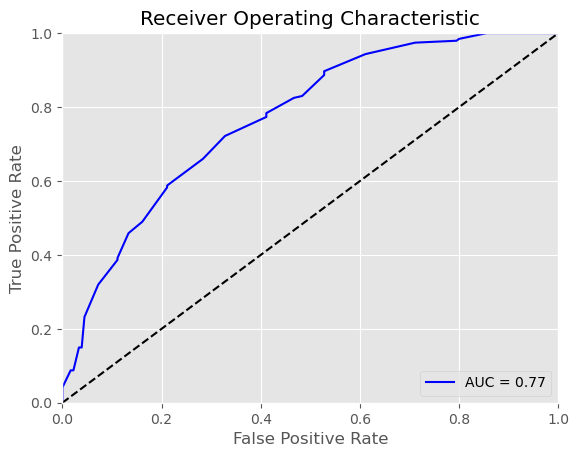

In [46]:
fpr, tpr, thresholds = roc_curve(test['team1_win'].values, test['prob'].values)
roc_auc = auc(fpr, tpr)
plot_roc(fpr, tpr, roc_auc)

In [47]:
roc_auc_score(test['team1_win'].values, test['prob'].values)

0.769201030927835

## Add Seed Difference & Distance

In [64]:
logit = LogisticRegression()
logit.fit(train[['team1_log5','diff_dist','seed_diff', 'team_season_wins_diff',
 'team_season_losses_diff',
 'school_ncaa_appearances_diff',
 'school_s16_appearances_diff',
 'school_ff_appearances_diff',
 '2pt_fg_pct_diff',
 '3pt_fg_pct_diff',
 'ft_pct_diff',
 'block_pct_diff',
 'opp_2pt_fg_pct_diff',
 'opp_3pt_fg_pct_diff',
 'opp_ft_pct_diff',
 'opp_block_pct_diff',
 '3pt_fg_rate_diff',
 'opp_3pt_fg_rate_diff',
 'assist_rate_diff',
 'opp_assist_rate_diff',
 'steal_rate_diff',
 'opp_steal_rate_diff',
 'adj_tempo_diff',
 'time_diff_team1_host_tempo',
 'adj_oe_diff',
 'time_diff_team1_host_oe',
 'adj_de_diff',
 'time_diff_team1_host_de']], train['team1_win'])

/Users/tuho/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
smlogit = smf.logit("team1_win ~ team1_log5 + diff_dist + seed_diff", train).fit()
smlogit.summary()

Optimization terminated successfully.
         Current function value: 0.546282
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              team1_win   No. Observations:                  919
Model:                          Logit   Df Residuals:                      915
Method:                           MLE   Df Model:                            3
Date:                Thu, 28 Mar 2024   Pseudo R-squ.:                  0.2119
Time:                        01:43:28   Log-Likelihood:                -502.03
converged:                       True   LL-Null:                       -637.00
Covariance Type:            nonrobust   LLR p-value:                 3.185e-58
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6861      0.385     -4.382      0.000      -2.440      -0.932
team1_log5     3.3830      0.754      4.485      0.000       1.905       4.862
diff_dist   6.675e-05   6.74e-05      0.991      0.322   -6.53e-05       0.000
seed_diff     -0.0740      0.024     -3.076      0.002      -0.121      -0.027
==============================================================================
"""

In [52]:
test['prob'] = logit.predict_proba(test[['team1_log5','diff_dist','seed_diff']])[:,1]
test['prediction'] = logit.predict(test[['team1_log5','diff_dist','seed_diff']])

In [53]:
accuracy_score(test['team1_win'], test['prediction'],)

0.7030456852791879

In [54]:
precision_score(test['team1_win'], test['prediction'])

0.7

In [55]:
recall_score(test['team1_win'], test['prediction'])

0.7106598984771574

In [56]:
f1_score(test['team1_win'], test['prediction'])

0.7052896725440806

In [60]:
log_loss(test['team1_win'].values, test['prob'].values)

0.5767026998610745

In [61]:
fpr, tpr, thresholds = roc_curve(test['team1_win'].values, test['prob'].values)
roc_auc = auc(fpr, tpr)
plot_roc(fpr, tpr, roc_auc)

NameError: name 'plot_roc' is not defined

In [62]:
roc_auc_score(test['team1_win'].values, test['prob'].values)

0.7714963024040816

# Add more difference variables

In [ ]:
logit = LogisticRegression()
logit.fit(train[['team1_log5','diff_dist','seed_diff', ]], train['team1_win'])

## Create Example Submission

In [58]:
example_submission = pd.read_csv('NCAA_Tourney_2002_2022.csv').query("season==2019").reset_index(drop=True)

In [59]:
example_submission['seed_diff'] = example_submission['team1_seed'] - example_submission['team2_seed']

In [60]:
example_submission['prob'] = seed_smlogit.predict(example_submission['seed_diff'])

In [61]:
example_submission[['game_id','prob']].head()

,game_id,prob
0,2019-1192-1341,0.513200
1,2019-1125-1396,0.513200
2,2019-1295-1300,0.513200
3,2019-1113-1385,0.513200
4,2019-1278-1257,0.393636


In [62]:
example_submission[['game_id','prob']].shape

(67, 2)

In [63]:
example_submission[['game_id','prob']].to_csv("trp_example_submission.csv", index=False)